In [ ]:
# Machine Learning Assignment
# Group Submission
# Group 9

In [1]:
# mounting google drive
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive')

os.environ['MLDS'] ='/content/drive/MyDrive/MLNN DS'

# upload Group_Project_Data 2.zip 
%cd /content/drive/MyDrive/MLNN DS

Mounted at /content/drive
/content/drive/MyDrive/MLNN DS


In [ ]:
# unzip input file 
# This will execute only the first time
!unzip \*.zip && rm *.zip

Archive:  Group_Project_Data 2.zip
replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

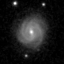

In [ ]:
#view a sample image
import cv2
from google.colab.patches import cv2_imshow
img = "/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/Real/img_1.png"
image = cv2.imread(img)
cv2_imshow(image)

In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

image_size = 224
labels = ('Real', 'Fake')
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype='object')

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

train = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/")
valid = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Valid/")

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [4]:
train_iterator = train.as_numpy_iterator()

In [5]:
valid_iterator = valid.as_numpy_iterator()

In [6]:
train_batch = train_iterator.next()

In [7]:
valid_batch = valid_iterator.next()

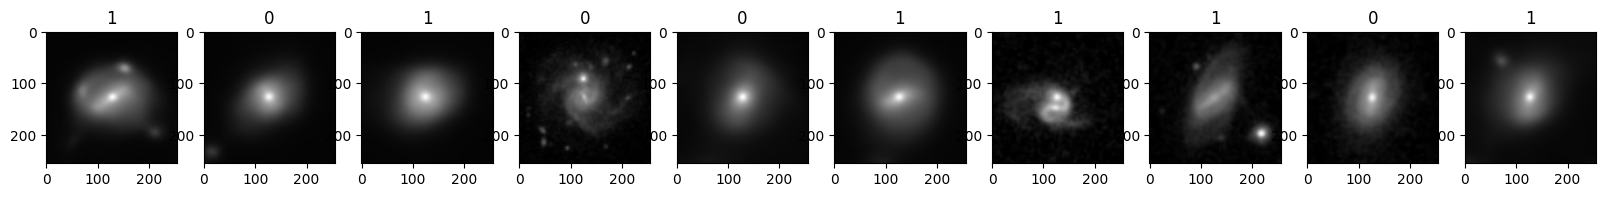

In [8]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(train_batch[0][10:20]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

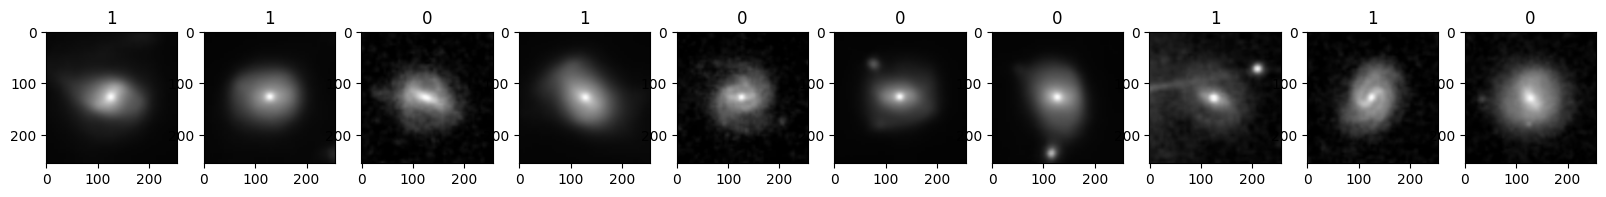

In [9]:
fig, ax = plt.subplots(ncols=10, figsize=(20,20))
for idx, img in enumerate(valid_batch[0][10:20]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(valid_batch[1][idx])

In [ ]:
# Class 0 = Fake images
# Class 1 = Real images



In [10]:
train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))

In [11]:
train.as_numpy_iterator().next()

(array([[[[0.04313726, 0.04313726, 0.04313726],
          [0.04313726, 0.04313726, 0.04313726],
          [0.04264706, 0.04264706, 0.04264706],
          ...,
          [0.03578432, 0.03578432, 0.03578432],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412]],
 
         [[0.04313726, 0.04313726, 0.04313726],
          [0.04313726, 0.04313726, 0.04313726],
          [0.04264706, 0.04264706, 0.04264706],
          ...,
          [0.03578432, 0.03578432, 0.03578432],
          [0.03529412, 0.03529412, 0.03529412],
          [0.03529412, 0.03529412, 0.03529412]],
 
         [[0.04215686, 0.04215686, 0.04215686],
          [0.04215686, 0.04215686, 0.04215686],
          [0.04178922, 0.04178922, 0.04178922],
          ...,
          [0.03615196, 0.03615196, 0.03615196],
          [0.03578432, 0.03578432, 0.03578432],
          [0.03578432, 0.03578432, 0.03578432]],
 
         ...,
 
         [[0.01960784, 0.01960784, 0.01960784],
          [0.01960

In [12]:
valid.as_numpy_iterator().next()

(array([[[[0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01911765, 0.01911765, 0.01911765],
          ...,
          [0.0122549 , 0.0122549 , 0.0122549 ],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.01960784, 0.01960784, 0.01960784],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01911765, 0.01911765, 0.01911765],
          ...,
          [0.0122549 , 0.0122549 , 0.0122549 ],
          [0.01176471, 0.01176471, 0.01176471],
          [0.01176471, 0.01176471, 0.01176471]],
 
         [[0.01911765, 0.01911765, 0.01911765],
          [0.01911765, 0.01911765, 0.01911765],
          [0.01868873, 0.01868873, 0.01868873],
          ...,
          [0.01268382, 0.01268382, 0.01268382],
          [0.0122549 , 0.0122549 , 0.0122549 ],
          [0.0122549 , 0.0122549 , 0.0122549 ]],
 
         ...,
 
         [[0.01960784, 0.01960784, 0.01960784],
          [0.01960

In [ ]:
len(data)

250

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [50]:
model = Sequential()

In [51]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [52]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

In [54]:
logdir='logs'

In [55]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [56]:
hist = model.fit(train, epochs=15, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/15
188/188 [==============================] - 22s 106ms/step - loss: 0.1260 - accuracy: 0.9418 - val_loss: 0.0233 - val_accuracy: 0.9940
Epoch 2/15
188/188 [==============================] - 20s 105ms/step - loss: 0.0113 - accuracy: 0.9962 - val_loss: 0.0116 - val_accuracy: 0.9965
Epoch 3/15
188/188 [==============================] - 20s 106ms/step - loss: 0.0124 - accuracy: 0.9962 - val_loss: 0.0082 - val_accuracy: 0.9985
Epoch 4/15
188/188 [==============================] - 20s 103ms/step - loss: 0.0120 - accuracy: 0.9962 - val_loss: 0.0154 - val_accuracy: 0.9955
Epoch 5/15
188/188 [==============================] - 19s 98ms/step - loss: 0.0125 - accuracy: 0.9953 - val_loss: 0.0090 - val_accuracy: 0.9980
Epoch 6/15
188/188 [==============================] - 20s 106ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 0.0117 - val_accuracy: 0.9980
Epoch 7/15
188/188 [==============================] - 21s 106ms/step - loss: 0.0012 - accuracy: 0.9995 - val_loss: 0.0067 - val_acc

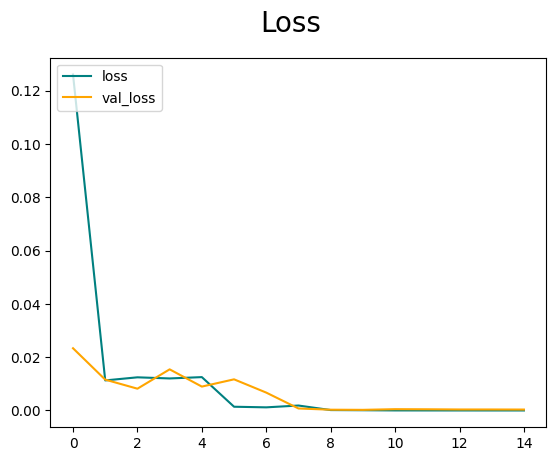

In [57]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

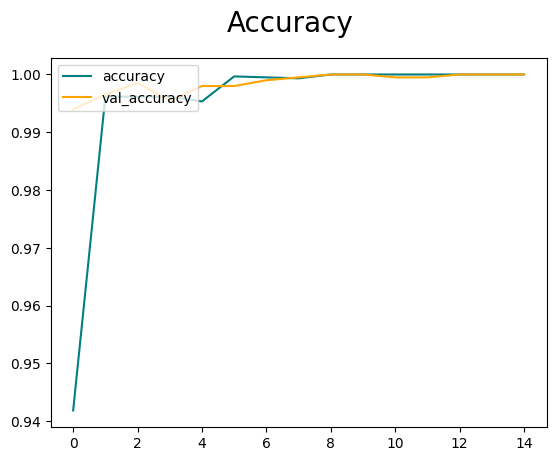

In [58]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

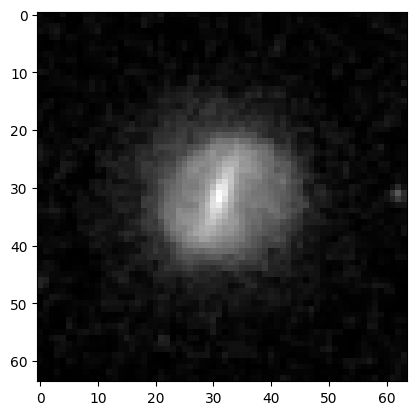

In [71]:
import cv2
img = cv2.imread("/content/drive/MyDrive/MLNN DS/test/img_43.png")
plt.imshow(img)
plt.show()



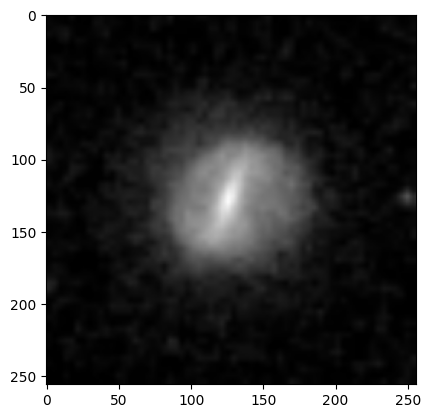

In [72]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [73]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)

In [74]:
if yhat > 0.5: 
    print(f'Predicted class is Real')
else:
    print(f'Predicted class is Fake')

Predicted class is Real


In [75]:
from tensorflow.keras.models import load_model